<a href="https://colab.research.google.com/github/kgeneral/pytorch-study/blob/master/4_4_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%8B%A4%EC%8A%B5_in_tf2_dykim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망 모델의 학습


## 필요한 라이브러리 불러오기

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 생성

In [0]:
num_data = 1000
num_epoch = 10000

noise = tf.random.normal(shape=[1000,1]) #init.normal_(torch.FloatTensor(num_data,1),std=1)
x = tf.random.uniform(shape=[1000,1], minval=-15, maxval=15) #init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 
y_noise = y + noise

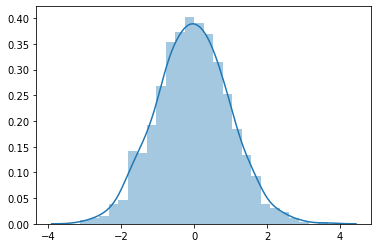

In [4]:
sns.distplot(noise)

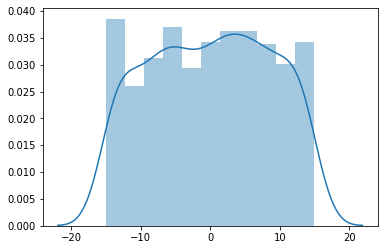

In [5]:
sns.distplot(x)

# 모델, 손실 함수, 최적화 함수 설정

In [6]:
"""
model = nn.Sequential(
          nn.Linear(1,6),
          nn.ReLU(),
          nn.Linear(6,10),
          nn.ReLU(),
          nn.Linear(10,6),
          nn.ReLU(),
          nn.Linear(6,1),
      )
"""
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(6, input_shape=(1,), activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1),
])


"""
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)
"""

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0002),
              loss='MAE', # tf.keras.losses.mean_absolute_error
              metrics=['MAE'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


## 모델의 학습

In [7]:
from time import time
cur_epochtime = int(time())

model.fit(x, y_noise, epochs=10000, steps_per_epoch=1, verbose=0)

elapsed_sec = int(time()) - cur_epochtime
print(elapsed_sec)

27


## 학습된 모델의 결과값과 실제 목표값의 비교

In [0]:
y_pred = model.predict(x)


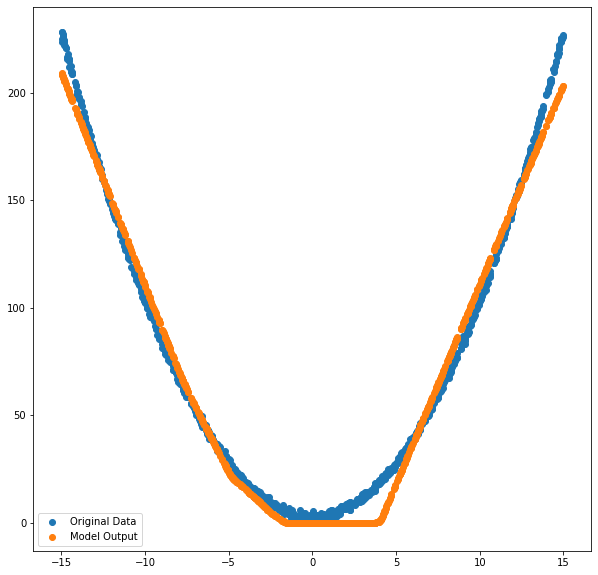

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x.numpy(),y_noise,label="Original Data")
plt.scatter(x.numpy(),y_pred,label="Model Output")
plt.legend()
plt.show()